In [11]:
import pandas as pd
import matplotlib.pyplot as plt

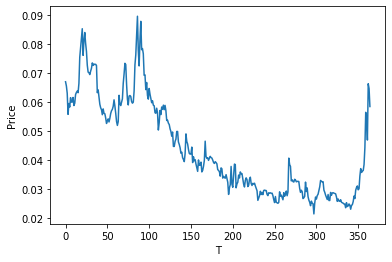

In [13]:
price = pd.read_csv("POKT Historical Price.csv").sort_values(by='Date')['Adj Close']
price.plot(kind='line')
plt.ylabel("Price")
plt.xlabel("T")
plt.show()

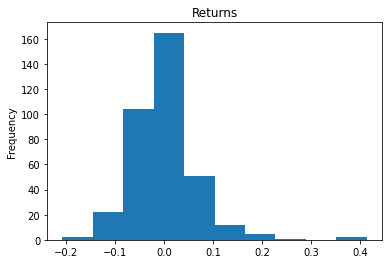

In [18]:
returns = price.pct_change()
returns.plot(kind='hist')
plt.title("Returns")
plt.show()

In [20]:
print(returns.mean())
print(returns.std())
print(returns.skew())
print(returns.kurtosis())

0.00166027149481152
0.06562764398482432
1.6116881741915297
8.526026443263422


In [23]:
print(returns.mean() - .5 * returns.std()**2)

-0.0004932223326879039


In [24]:
print(returns.mean() * 2 - .5 * returns.std()**2)

0.001167049162123616


In [25]:
returns.mean() * 2

0.00332054298962304